In [1]:
# 선형회귀

In [2]:
# 1. 최근접 이웃 한계점
# 근접하는 데이터를 기반으로 예측하여 추가적인 데이터가 없다면 제대로 예측하지 못함
import numpy as np
# 1-1. 농어 길이와 무게 데이터 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 1-2. 데이터 훈련셋, 테스트셋 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 데이터셋 2차원으로 변경하기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

# 1-3. 최근접이웃 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=4)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

# 50cm 농어 무게 = 1.5kg 현실 괴리




(42, 1) (14, 1)
[1050.]


In [4]:
# 2. 선형회귀 알고리즘
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 2-1-1. 선형회귀 훈련 
lr.fit(train_input, train_target)

# 2-1-2. 50cm 농어 예측하기
print(lr.predict([[50]]))

[1241.83860323]


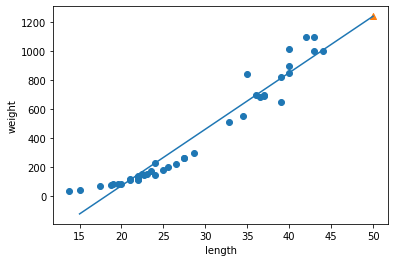

In [5]:
# 2-2. 농어 데이터 예측하기
# 2-2-1. 데이터 시각화
import matplotlib.pyplot as plt
# 산점도 그리기
plt.scatter(train_input, train_target)

# 15~50 방정식 그래프 
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
# 2-2-3. 결정계수 (R2) 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


In [7]:
# 3. 다항회귀(곡선 회귀) 선형X

# 3-1. 데이터 제곱
# 2차 방정식 => 데이터 제곱 : np.column_stack 사용
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

# 3-2. 데이터 훈련하기
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 3-2-1. 50cm 농어 무게 예측값
print(lr.predict([[50**2, 50]]))

# 3-2-2. 모델 계수, 절편 출력
print(lr.coef_, lr.intercept_)

(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


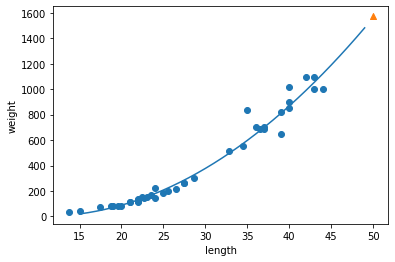

In [8]:
# 3-3. 산점도 그래프
# 정수 배열 만들기
p = np.arange(15, 50)

# 훈련세트 산점도 그리기
plt.scatter(train_input,train_target)

# 15~49 2차 방정식 그리기
plt.plot(p, 1.01*p**2 - 21.6*p + 116.05)

# 그래프 그리기
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
